## What is this project about?
So we'll try to write an algorithm that will predict the health of an engine based on provided data

The dataset has has been taken from Kaggle dataset repositories

We'll start by:
1: Data exploring and cleaning / data preprocessing
2: Feature Engineering and selection
3: Model selection and training
4: Model evaluation
5: Hyperparameter tuning 
6: Finally Deployment 

## Importing the statements 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('engine_data.csv')

# 1: DATA EXPLORATION AND CLEANING 

### Preliminary data exploration 
* What is the shape of `dataset`? 
* How many rows and columns?
* What are the column names?
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values? 

In [4]:
dataset.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [5]:
dataset.shape

(19535, 7)

In [6]:
dataset.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')

In [7]:
dataset.duplicated().value_counts()

False    19535
Name: count, dtype: int64

In [8]:
dataset.isna().value_counts()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  lub oil temp  Coolant temp  Engine Condition
False       False             False          False             False         False         False               19535
Name: count, dtype: int64

No missing values nor duplicated values in the dataset 

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


## Data visualization

In [10]:
import seaborn as sns 

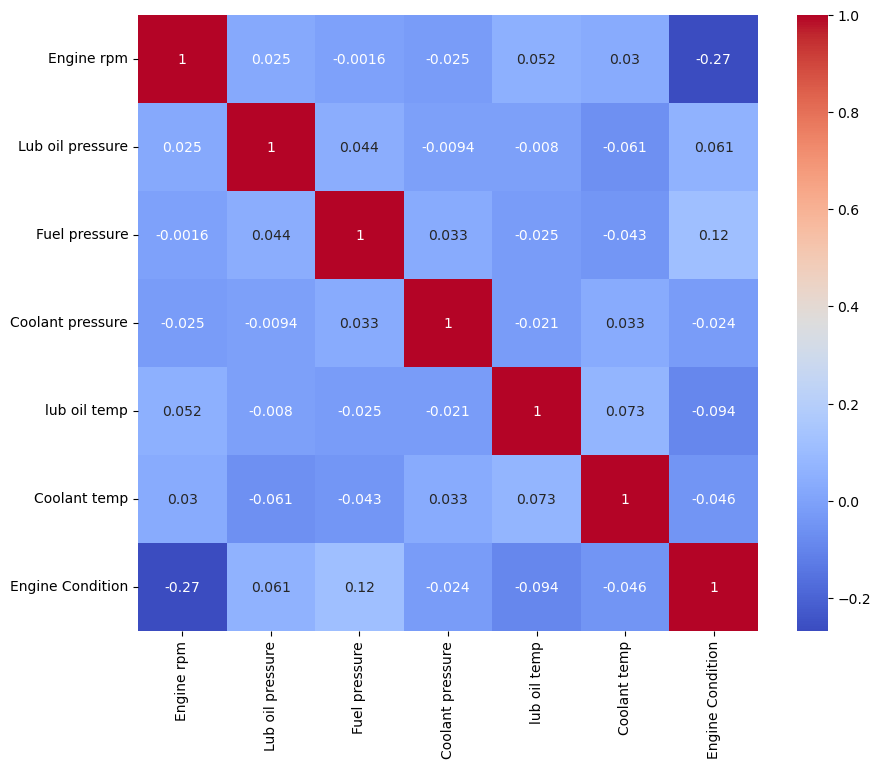

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()


From the correlation map above we can see that not a single feature has high correlation to the output hence we can say that the output is influenced by the combination of all features, all of them play a role

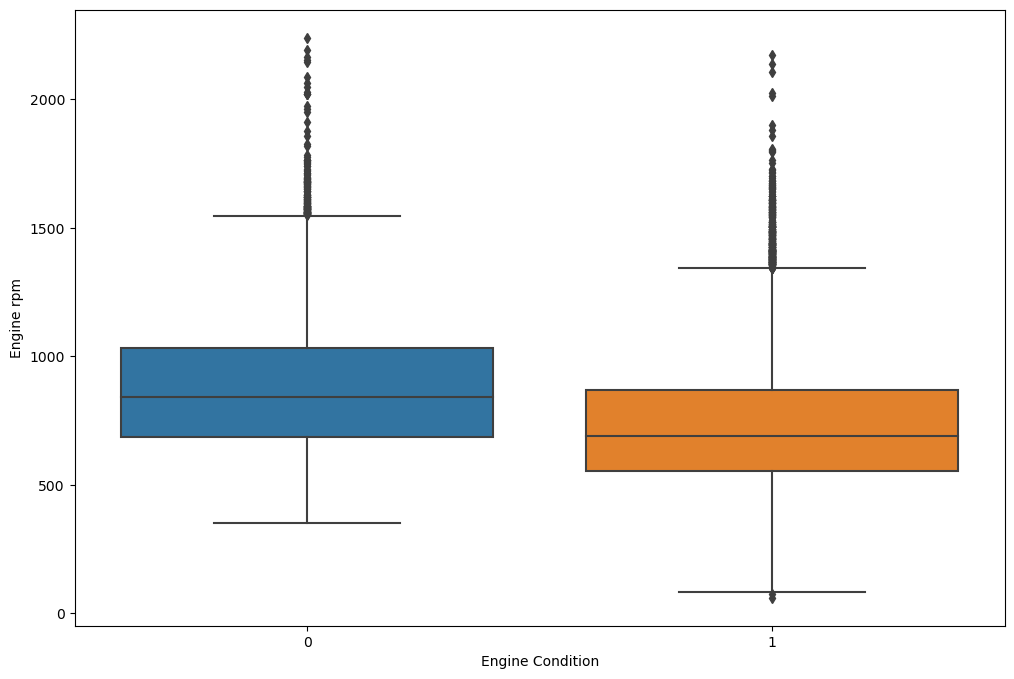

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Engine Condition', y='Engine rpm', data=dataset)
plt.show()

The box plot above between the engine rpm and engine condition suggests that as the engine rpm is higher the engine condition might be faulty 

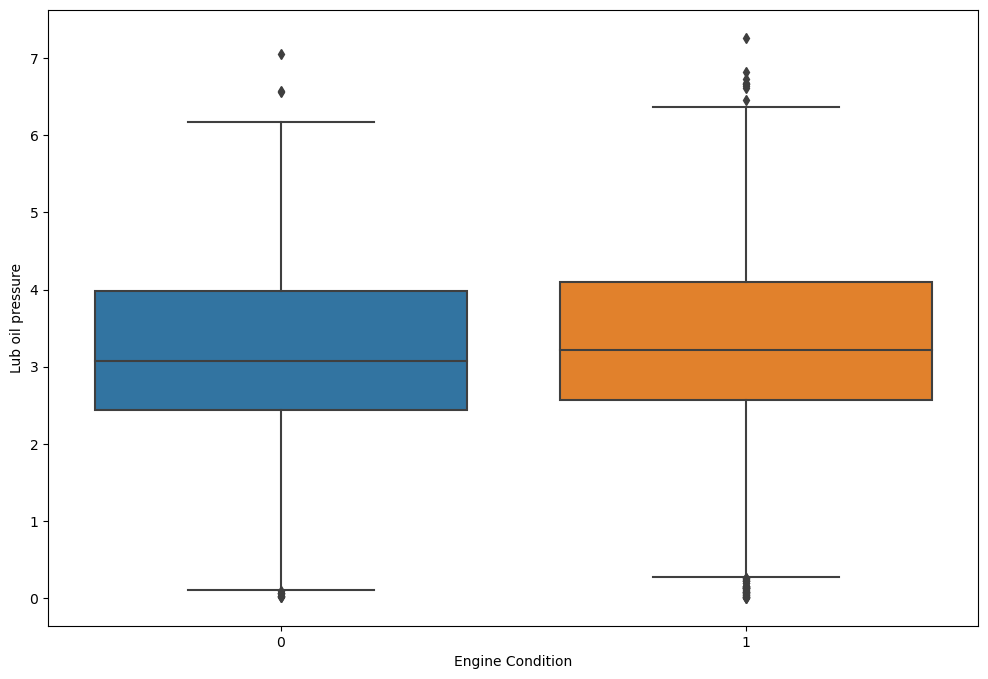

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Engine Condition', y='Lub oil pressure', data=dataset)
plt.show()

For the Lub oil pressure there's not really a big difference, but we can still see that the median is a little bit higher for good engines

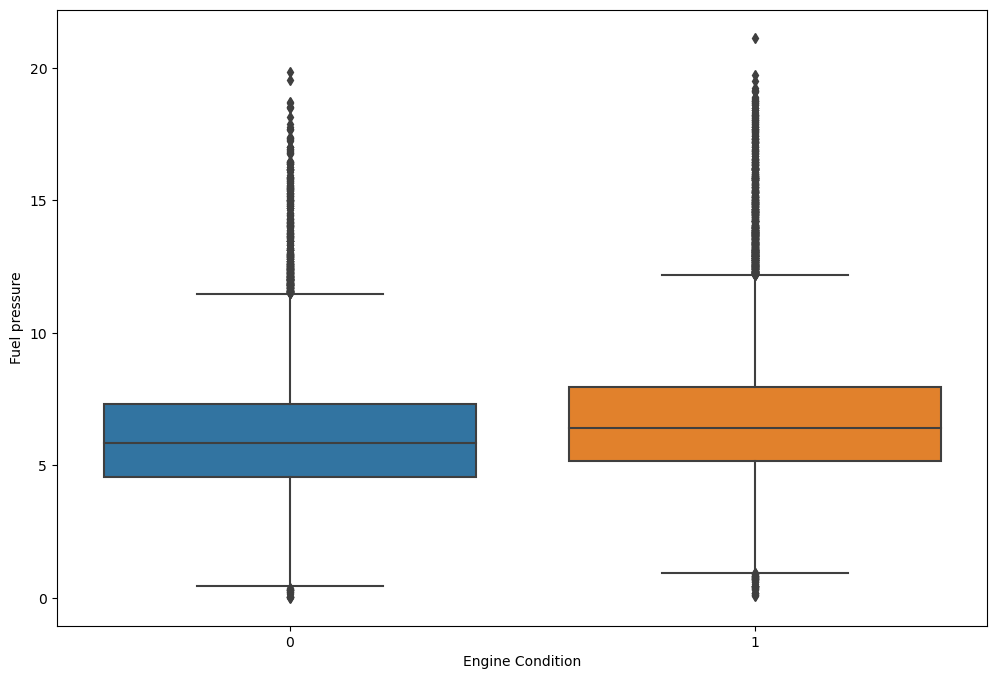

In [27]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Engine Condition', y='Fuel pressure', data=dataset)
plt.show()

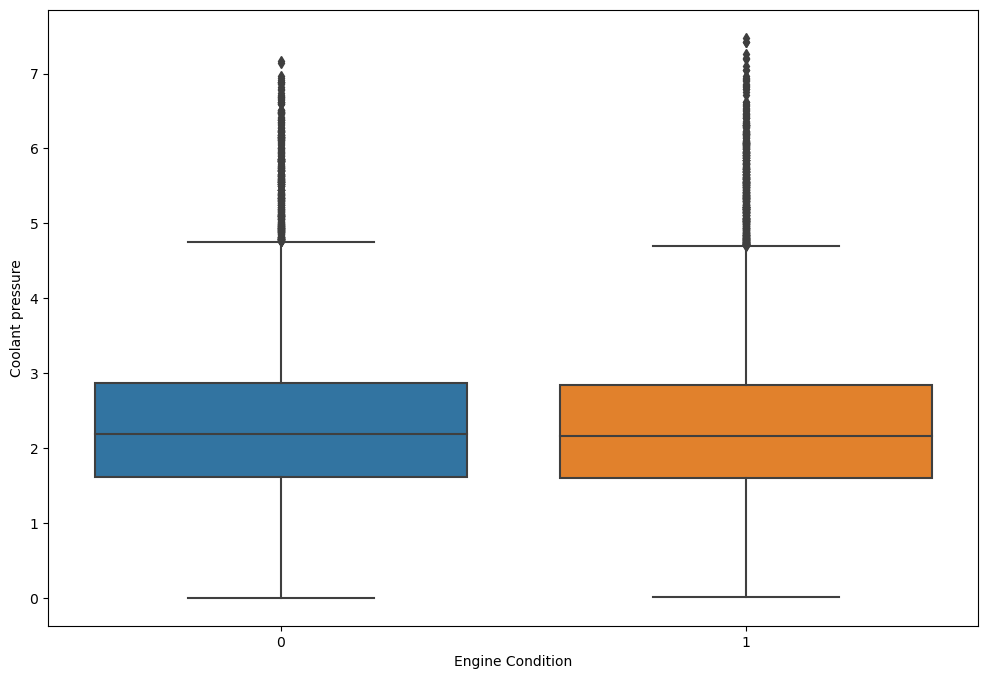

In [28]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Engine Condition', y='Coolant pressure', data=dataset)
plt.show()

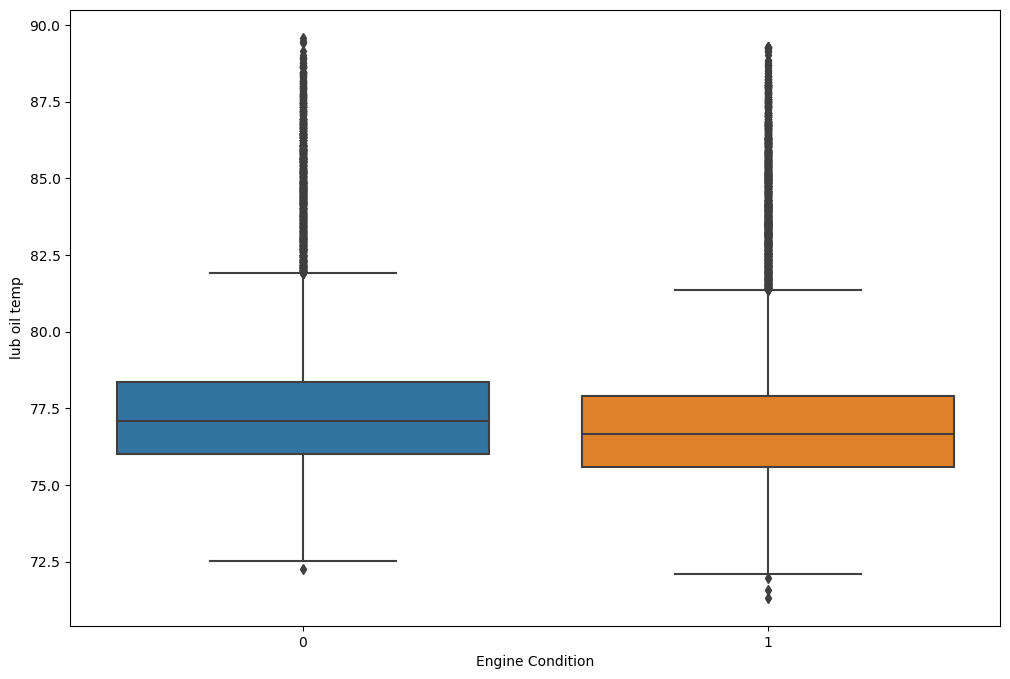

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Engine Condition', y='lub oil temp', data=dataset)
plt.show()

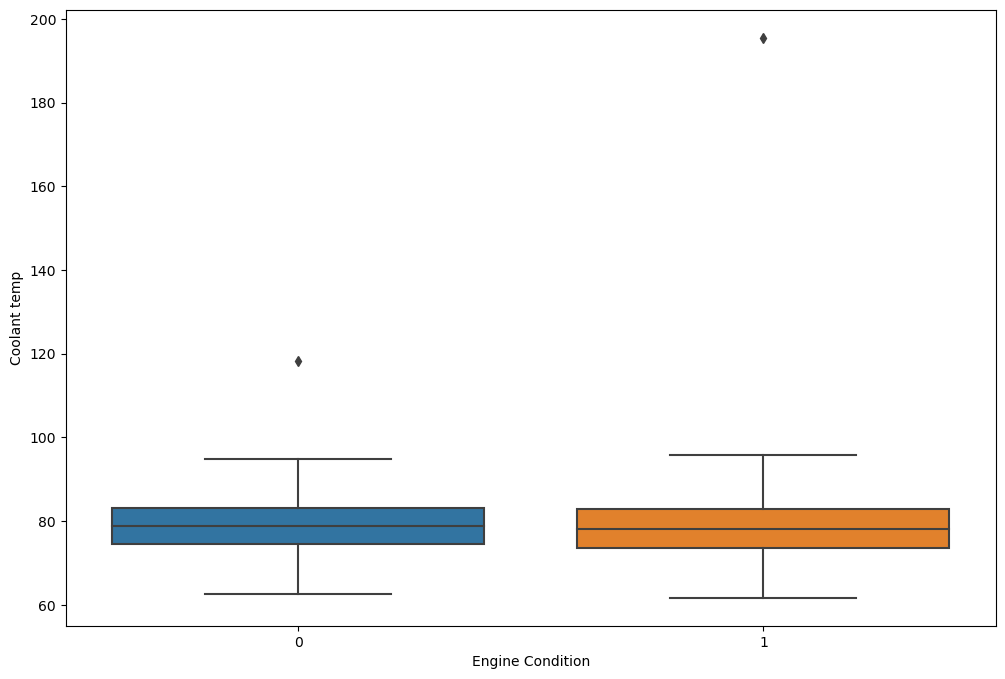

In [32]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Engine Condition', y='Coolant temp', data=dataset)
plt.show()

In summary we can say that from the charts, there's no really strong single correlation between on feature and the output, for the engine rpm the higher the value the more likely it is faulty, for the fuel pressure and lub pressure  the higher the value the more likely the engine is in good condition, for the coolant pressure and temperature nothing much can really be said. 

# 2: FEATURE ENGINEERING AND SELECTION 
We will train the model based on available and later engineer features to compare the result that has been obtained so as to have a better idea of which selection would be the better one. 

# 3: MODEL SELECTION AND TRAINING
* Splitting the dataset into features X and variable y
* Splitting the dataset into the training, validation and test set 